In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima import auto_arima


In [12]:

data_dir = "/Users/coopg/Github/group6-project/data/"

csv = data_dir + "Seattle Aquarium (pH).csv"
df_SA_pH = pd.read_csv(csv)
df_SA_pH_Cleaned = df_SA_pH.loc[df_SA_pH["pH"]<=10,:]


csv = data_dir + "Seattle Aquarium (Water Temperature).csv"
df_SA_WT = pd.read_csv(csv)
df_SA_WT_Cleaned = df_SA_WT.loc[df_SA_WT["Water Temp"]<=100,:]

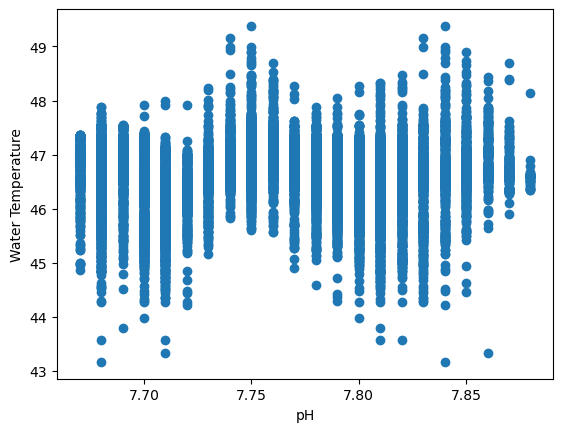

In [13]:
combined_Seattle_df = pd.merge(left=df_SA_pH_Cleaned, right=df_SA_WT_Cleaned, how='left', left_on='Date and Time', right_on='Date and Time')

figure, ax = plt.subplots()
ax.scatter(combined_Seattle_df['pH'], combined_Seattle_df['Water Temp'])
ax.set_xlabel('pH') 
ax.set_ylabel('Water Temperature')
plt.show()

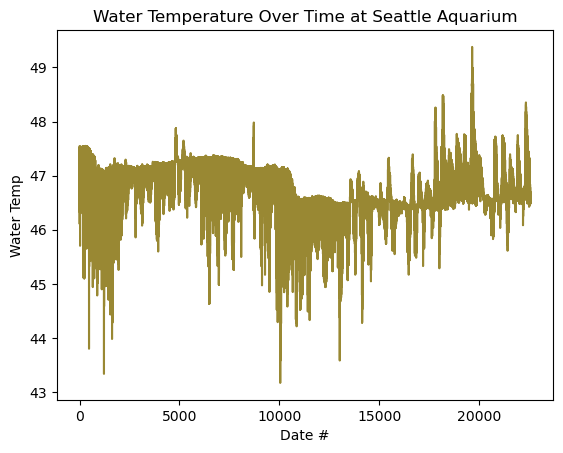

In [14]:
counting_list = []

for each in range (0,22568):
    counting_list.append(each)

combined_Seattle_df['Date #'] = counting_list
figure, ax = plt.subplots()
ax.plot(combined_Seattle_df['Date #'], combined_Seattle_df['Water Temp'], color='#983') # a dark charcoal
ax.set_xlabel('Date #')
ax.set_ylabel('Water Temp')
ax.set_title('Water Temperature Over Time at Seattle Aquarium')
plt.show()

# ARIMA for pH and water temp over time (possibly test for stationarity)
# maybe take an average for each day instead of comparing thousands of data points
# seasonal decomposition
# correlation and linear regression for pH vs. water temp (more important)!

In [22]:
from statsmodels.tsa.arima.model import ARIMA

model1 = auto_arima(combined_Seattle_df['pH'])

print(model1.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                22568
Model:               SARIMAX(2, 1, 1)   Log Likelihood               84296.010
Date:                Wed, 03 May 2023   AIC                        -168584.020
Time:                        17:29:38   BIC                        -168551.923
Sample:                             0   HQIC                       -168573.580
                              - 22568                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       1.309e-08   6.71e-13   1.95e+04      0.000    1.31e-08    1.31e-08
ar.L2         -0.9966      0.000  -2613.868      0.000      -0.997      -0.996
ma.L1      -1.114e-11   5.15e-12     -2.161      0.0

In [24]:
model2 = auto_arima(combined_Seattle_df['Water Temp'])

print(model2.summary())

KeyboardInterrupt: 

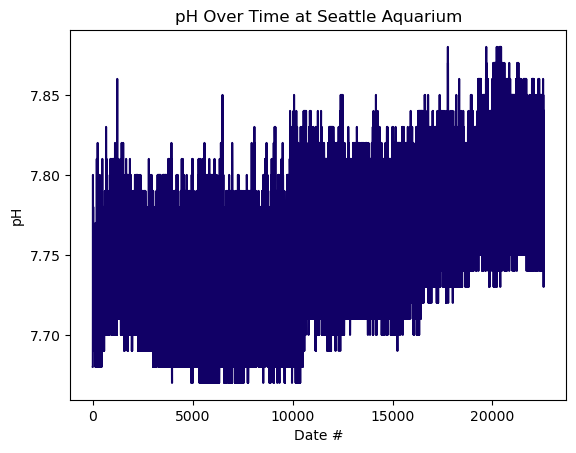

In [17]:
figure, ax = plt.subplots()
ax.plot(combined_Seattle_df['Date #'], combined_Seattle_df['pH'], color='#106') # a dark charcoal
ax.set_xlabel('Date #')
ax.set_ylabel('pH')
ax.set_title('pH Over Time at Seattle Aquarium')
plt.show()

For our hypothesis test, we will test:

1. Can one variable be used to predict another?
2. Does a value increase, decrease, or stay the same over time?